
# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Data Science 209a final Project Stock Data

## Analyzing Stock Data for Data Science

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Kevin Rader

<hr style="height:2pt">



In [10]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)


### DESCRIPTION

- here we one-hot encode the data-frame and eliminate NA values, replacing them with zeros.

In [91]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

import seaborn as sns
sns.set()
def easy_plot_details(axis, title, xlabel, ylabel, subtitle = False):
    """This function allows for simple plot axis labeling and formating.
    """
    if subtitle == True:
        axis.title.set_text(title[0])
        axis.title.set_size(title[1])
        axis.set_xlabel( xlabel[0])
        axis.set_ylabel( ylabel[0])
    else:
        axis.tick_params( labelsize=12)
        axis.set_title(  title[0], fontsize = title[1])
        axis.set_ylabel( ylabel[0], fontsize = ylabel[1])
        axis.set_xlabel( xlabel[0], fontsize = xlabel[1])
    axis.legend(loc = 'best', fontsize=14);
import warnings
warnings.filterwarnings('ignore')

In [23]:
delt = pd.read_csv("amer_delt.csv")

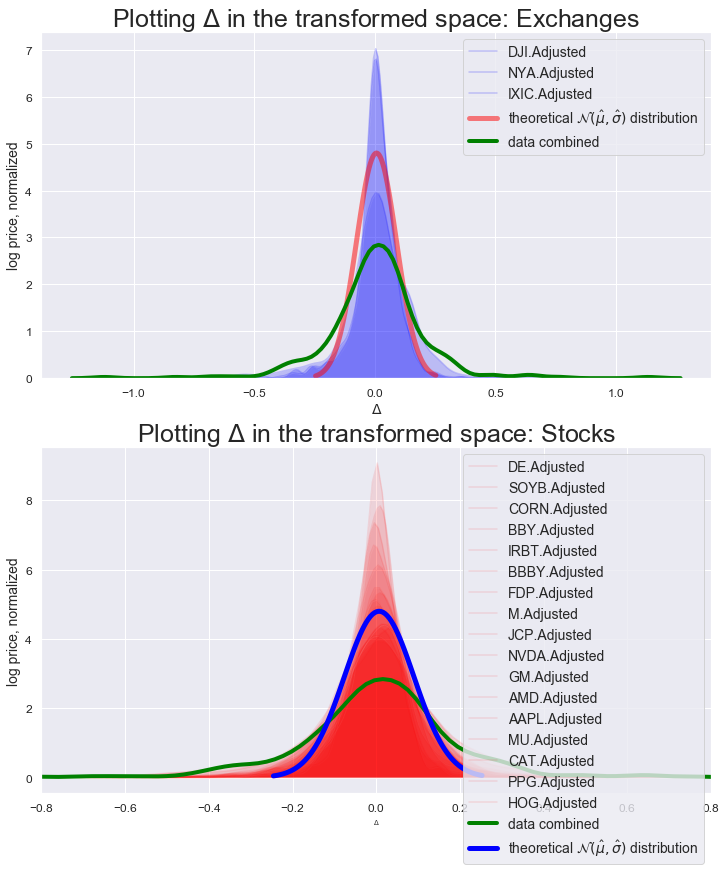

In [122]:
import math
from scipy import stats

fig, ax = plt.subplots(2, 1, figsize=(12, 14))

for i in range(4):
    if i > 0:
        g = sns.kdeplot(delt.iloc[:,17+i],ax = ax[0], shade = True, color = "blue", alpha = 0.2)
        #g.set(ylim=(0, None))
        
mu = np.mean(delt["combined"])
variance = np.var(delt["combined"])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[0].plot(x, stats.norm.pdf(x, variance, sigma), color = "red", linewidth = 5, alpha = 0.5,
           label = "theoretical $\mathcal{N}(\hat{\mu}, \hat{\sigma})$ distribution")
ax[0].legend()

for i in range(18):
    if i > 0:
        g = sns.kdeplot(delt.iloc[:,i],ax = ax[1], shade = True, color = "red", alpha = 0.1)
        #g.set(ylim=(0, None))
ax[1].set_xlim(-0.8,0.8)

#sns.kdeplot(np.mean(delt.iloc[:,:18], axis = 0),ax = ax[2], shade = False, color = "green", alpha = 1, linewidth = 4, label = "data combined")

sns.kdeplot(delt.iloc[:,24],ax = ax[0], shade = False, color = "green", alpha = 1, linewidth = 4, label = "data combined")



sns.kdeplot(delt.iloc[:,24],ax = ax[1], shade = False, color = "green", alpha = 1, linewidth = 4, label = "data combined")





mu = np.mean(delt["combined"])
variance = np.var(delt["combined"])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[1].plot(x, stats.norm.pdf(x, variance, sigma), color = "blue", linewidth = 5, alpha = 1,
           label = "theoretical $\mathcal{N}(\hat{\mu}, \hat{\sigma})$ distribution")


xt = "$\Delta$"
yt = "log price, normalized"
easy_plot_details(ax[0], ["Plotting $\Delta$ in the transformed space: Exchanges", 25],
                  [xt, 14], [yt, 14])
        
easy_plot_details(ax[1], ["Plotting $\Delta$ in the transformed space: Stocks", 25],
                  [xt, 7], [yt, 14])

# All stock data was processed and analyzed in R. We are have a difficult time getting R to work locally so the commented code has been included below. We will also submit the .RMD files:

In [ ]:
require("quantmod")

chinese.stocks <- c("BZUN", "BABA", "MOMO", "PDD")

amer.stocks <- c("DE","SOYB", "CORN","BBY","IRBT", "BBBY", 
                 "FDP", "M", "JCP", "NVDA", "GM", "AMD", "AAPL", "MU", 
                 "CAT", "PPG", "HOG", "^DJI", "^NYA", "^IXIC", "BZUN", "BABA", "MOMO", "PDD")

get_data <- function(stock_lst) 
{
  lst<-c()
  lst2 <- c()
  count <- 1
  for (stockk in stock_lst)
  {
    
    hii <- getSymbols(stockk, from = "2017-01-01", auto.assign = F)
    stock.col.name = gsub("[^[:alnum:] ]", "", stockk)
    
    adj_col <- paste0(stock.col.name,".Adjusted")
    vol_col <- paste0(stock.col.name,".Volume")
    
    
    
    if (count == 1)
    {
      lst <- hii[ , adj_col]
      lst2 <- hii[ , vol_col]
    }
    else
    {
      lst  <- cbind(lst, hii[, adj_col])
      lst2 <- cbind(lst2, hii[, vol_col])
    }
    count = count + 1
  }
  list(Adj = lst,Vol =lst2)
}
Cin_dat <- get_data(chinese.stocks)
head(Cin_dat$Adj)
head(Cin_dat$Vol)

In [ ]:

Amer.dat <- get_data(amer.stocks)
#head(Amer.dat$Adj)
#head(Amer.dat$Vol)
dates <- rownames(as.data.frame(Amer.dat))
#plot(Amer.dat$Adj$DJI.Adjusted)

In [ ]:
log.norm.transform<- function(lst2)
{
  means   <- c()
  stderrs <- c()
  for( i in 1:length(lst2[1,]))
  {
    lst2[,i] <- log(as.numeric(lst2[,i])+0.01) #* ratios[i]
    
    mn     = mean(na.omit(lst2[,i]))
    means <- c(means, mn)
    stderr = sqrt(var(na.omit(lst2[,i])))
    stderrs <- c(stderrs, stderr)
    lst2[,i] <- (lst2[,i] - mn)
    lst2[,i] <- as.vector(lst2[,i]) / stderr
    
  }
  lst2
}

In [ ]:
log.adj.cin = log.norm.transform(Cin_dat$Adj)

log.adj.amer = log.norm.transform(Amer.dat$Adj)

write.csv(log.adj.cin , file = "/Users/hayden/Desktop/HSenior/s1/ds1/final_project/final_round/upload/log_adj_chinese_combo.csv")
write.csv(log.adj.amer, file = "/Users/hayden/Desktop/HSenior/s1/ds1/final_project/final_round/upload/log_adj_amer_combo.csv")


In [ ]:
require("ks")


deltt <- function(zooo, mov = FALSE)
{
  stocks <- zooo
  nroww <- nrow(stocks)
  exchange.idx = grepl("DJI", colnames(stocks)) | grepl("IXIC", colnames(stocks)) | grepl("NYA", colnames(stocks))

  
  if(mov == TRUE)
  {
    for(col_num in 1:ncol(stocks))
    {
      
      #movavg(df[,col_num], n = 3, type = "e")
      idx <- !is.na(stocks[,col_num])
      
      L <- (length(movavg((stocks[,col_num]), n = 3, type = "e")))
      N <- nrow(stocks)
      s = (N-sum(idx))
      stocks[(s+1):N,col_num] <- movavg(na.omit(stocks[,col_num]), n = 3, type = "e")
    }
  }
  
  for (col in colnames(stocks))
  {
    stock_spec  <- col
    delt <- rep(NA, nrow(stocks))
    prev <- NA
    #dummyx <- 1:(nrow(stocks)-1)
    for (i in 1:nrow(stocks))
    {
      this <- stocks[i, stock_spec]
      if( i > 1)
      {
        delt[i] <- as.numeric(this) - as.numeric(prev)
      }
      prev <- this
    }
    stocks[, stock_spec]<- delt
  }
  

  
  stocks$combined= NA
  for (i in 1:length(stocks$combined))
  {
    #print( lst2[i, "combined"] )
    
    stocks[i, "combined"] =  0.5 * mean(stocks[i,exchange.idx], na.rm = T) +  0.5 *mean(stocks[i,-exchange.idx], na.rm = T)
  }
  stocks
}

amer.delt <- deltt(log.adj.amer, mov = FALSE)
amer.delt.mov <- deltt(log.adj.amer, mov = TRUE)

In [ ]:
library("scales")
#plt.complex(amer.delt)
plt.complex<- function(df, mainn)
{
  df[,"combined"] <- as.zoo(as.numeric( df[,"combined"] ))
  n_1 = (ncol(df)-1)
  for(i in 1:n_1)
  {
    if(i==1)
    {
      p<- plot(abs(df[,i]), main = paste(mainn), data = df, 
               col = alpha("black", 0.1), ylim =c (0, 0.5),
               xy.labels = ""
               )
    }
    lines(df[,i], col = alpha("red", 0.2), lwd = 2)
  }
  lines(df[,"combined"], col = alpha("black", 0.7), lwd = 2)
  p
}

print((rownames(amer.delt.export)))
p0 <- plt.complex(amer.delt, "American Stocks Abs(Delta) 2017-2019")
amer.delt.export <- abs(amer.delt)

amer.delt.export <- abs(amer.delt)
amer.delt.export$date <- NA
amer.delt.export[,"date"] <- dates

amer.delt.export <- (amer.delt.export[2:nrow(amer.delt),])

p0
  png(paste0("amer_vol_abs.png"))
  print(p0)
dev.off()

write.csv((amer.delt.export), file = "/Users/hayden/Desktop/stocks_vol_abs.csv")

In [ ]:
library("scales")
#plt.complex(amer.delt)
plt.complex_sq<- function(df, mainn)
{
  df[,"combined"] <- as.zoo(as.numeric( df[,"combined"] ))
  n_1 = (ncol(df)-1)
  for(i in 1:n_1)
  {
    if(i==1)
    {
      p<- plot(df[,i], main = mainn, data = df, col = alpha("black", 0.1))
    }
    lines(df[,i], col = alpha("red", 0.2), lwd = 2)
  }
  lines(df[,"combined"], col = alpha("black", 0.7), lwd = 2)
  p
}

p0 <- plt.complex_sq(amer.delt, "Stocks Delta 2017-2019")

amer.delt.export <- amer.delt
amer.delt.export$date <- NA
amer.delt.export$date <- (rownames(as.data.frame(amer.delt)))
amer.delt.export <- (amer.delt.export[2:nrow(amer.delt),])


p0
  png(paste0("upload/stocks_delta.png"))
  print(p0)
dev.off()
write.csv(amer.delt.export, file = "/Users/hayden/Desktop/HSenior/s1/ds1/final_project/final_round/upload/stocks_delta.csv")


amer.delt.export.mov <- amer.delt.mov
amer.delt.export.mov$date <- NA
amer.delt.export.mov$date <- (rownames(as.data.frame(amer.delt.mov)))
amer.delt.export.mov <- (amer.delt.export.mov[2:nrow(amer.delt.export.mov),])

p0 <- plt.complex_sq(amer.delt.mov, "Stocks Delta, 3 day moving average 2017-2019")
p0
  png(paste0("upload/stocks_delta_3day_mov.png"))
  print(p0)
dev.off()
write.csv(amer.delt.export.mov, file = "/Users/hayden/Desktop/HSenior/s1/ds1/final_project/final_round/upload/stocks_delta_mov.csv")


In [ ]:
library("scales")
#plt.complex(amer.delt)
plt.complex<- function(df, mainn, limm = c(0,0.5))
{
  combin <- c()
  
  exchange.idx = grepl("DJI", colnames(df)) | grepl("IXIC", colnames(df)) | grepl("NYA", colnames(df))


  if("combined" %in% colnames(df))
  {
    df[,"combined"] <- as.zoo(as.numeric( df[,"combined"] ))
  }
  else
  {
    for(i in 1:nrow(df))
    {
      
       NYSE.idx = grepl("NYA", colnames(log.adj.amer))
       combin <- c(combin, 0.5 * mean(df[i,exchange.idx], na.rm = T) + 
                     0.5 *mean(df[i,-exchange.idx], na.rm = T) )
    }
  }
  
  
  n_1 = (ncol(df)-1)
  p<- plot(abs(df[,1]), main = mainn, data = df, col = alpha("black", 0.1), ylim = limm)
  for(i in 1:n_1)
  {
    lines(df[,i], col = alpha("red", 0.2), lwd = 2)
  
  }

  if("combined" %in% colnames(df))
  {
    print(paste("n_1" ,n_1))
    lines(df[,"combined"], col = alpha("black", 0.7), lwd = 2)
  }
  else
  {
   
    df$combined <-  combin
    lines( df[,"combined"], col = alpha("black", 0.7), lwd = 2)
  }
  
  p
}

p0 <- plt.complex(amer.delt, "American Stocks Delta 2017-2019")

amer.delt.export <- amer.delt
amer.delt.export$date <- NA
amer.delt.export$date <- (rownames(as.data.frame(amer.delt)))
amer.delt.export <- (amer.delt[2:nrow(amer.delt),])

p0
  png(paste0("amer_vol_abs.png"))
  print(p0)
dev.off()

write.csv((amer.delt.export)^2, file = "/Users/hayden/Desktop/stocks_vol_abs.csv")

In [ ]:
p0 <- plt.complex(log.adj.amer, "Log Adjusted stock prices", limm = c(-3, 3))

amer.delt.export <- amer.delt
amer.delt.export$date <- NA
amer.delt.export$date <- (rownames(as.data.frame(amer.delt)))
amer.delt.export <- (amer.delt[2:nrow(amer.delt),])

p0
  png(paste0("amer_stock_prices_logadj.png"))
  print(p0)
dev.off()

In [ ]:
require("pracma")



mov_avg_plot <- function(df, col_num, seqq = seq(2, 100, by = 5), coll = "red")
{
  
  col_spec = colnames(df)[col_num]
  p <- plot(movavg(df[,col_num], n = 2, type = "e"), type = 'l', col = alpha("black", 0.5), 
       main = paste(col_spec, "Moving Average as n increases, from 2 to 100"), 
       ylab = "log-normal adjusted price")
  
  for( i in seqq)
  {
    lines(movavg(df[,col_num], n = i, type = "e"), type = 'l', col = alpha(coll, i/max(seqq)))
  }
  p
}
library("grid")
library("ggplotify")

colss<- c("darkorange", "magenta", "red", "blue", "cyan", "navyblue")
for(i in 1:ncol(log.adj.amer))
{
  color_spec = sample(colss, 1)
  print(color_spec)
  mov_avg_plot(log.adj.amer, col_num = i, coll = color_spec )
  p0 = recordPlot()
  namee <- gsub("\\..*","",colnames(log.adj.amer)[i])
  p0
  png(filename = paste0("mov_plots/",namee,"_movavg.png"))
    print(p0)
  dev.off()
}


